In [3]:
#importing needed packages

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

#Reading the data

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#Data Exploration 
#summarising the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
#Let select some features to explore more
cdf = df[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS", "CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,8.5,4,196
1,2.4,9.6,4,221
2,1.5,5.9,4,136
3,3.5,11.1,6,255
4,3.5,10.6,6,244
5,3.5,10.0,6,230
6,3.5,10.1,6,232
7,3.7,11.1,6,255
8,3.7,11.6,6,267


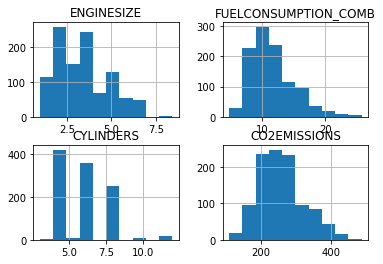

In [10]:
#we can plot each of these features against each other

viz = cdf[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS", "CO2EMISSIONS"]]
viz.hist()
plt.show()

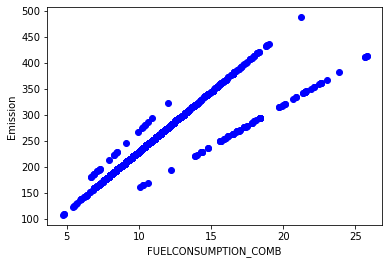

In [11]:
#Now, let's plot each of these features against the Emission, to see how linear their relationship is:
# For FUELCONSUMPTION_COMB against Emission

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

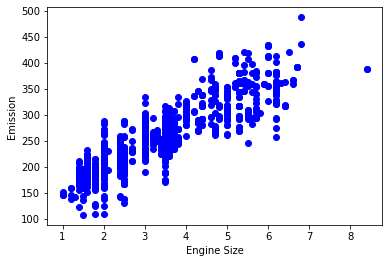

In [14]:
# For Engine Size against CO2 Emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

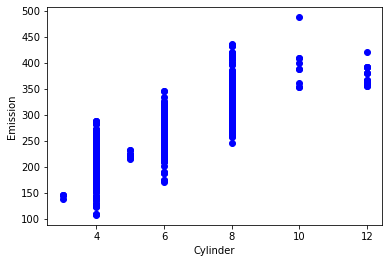

In [15]:
# For Cylinder against CO2 Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [16]:
# CREATING TRAIN AND TEST DATA

#split the entire dataset into test and training set- 80% to train and 20% to test using the np.random.rand() function

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

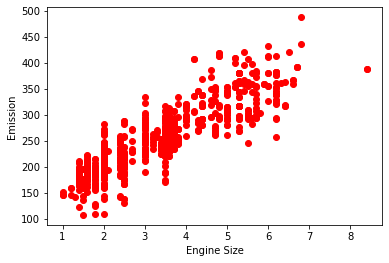

In [29]:
# Training the data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [22]:
# MODELLING
#Using sklearn package to model data.
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficient
print('Coeffiecent:', regr.coef_)
print('Intercept:', regr.intercept_)

Coeffiecent: [[38.84007122]]
Intercept: [125.87291041]


Text(0, 0.5, 'Emission')

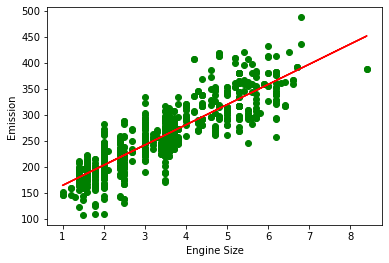

In [30]:
# Ploting Output
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.plot(train_x, regr.coef_[0][0]* train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares(MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2 score: %2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 20.60
Residual sum of squares(MSE): 789.13
R2 score: 0.808905


In [32]:
# Training the model on Fuelcomsuption_comB
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

In [38]:
# Training a Linear Regression Model using the train_x you created and the train_y created previously

regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

#the coeffici
print('Coeffiecent:', regr.coef_)
print('Intercept:', regr.intercept_)

Coeffiecent: [[17.03812542]]
Intercept: [60.17289478]


In [41]:
# Finding prediction
prediction = regr.predict(test_x)

In [42]:
# Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value 

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares(MSE): %.2f" % np.mean((prediction - test_y) **2))
print("R2 score: %2f" % r2_score(test_y , prediction) )

Mean Absolute Error: 21.07
Residual sum of squares(MSE): 1065.79
R2 score: 0.741908


In [43]:
# Training model on CylinderS

train_x = train[["CYLINDERS"]]
test_x = test[["CYLINDERS"]]

In [45]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

#the coefficient:
print("Coefficient:", regr.coef_)
print("Intercept:", regr.intercept_)


Coefficient: [[29.49230035]]
Intercept: [84.61885831]


In [46]:
assumption = regr.predict(test_x)

In [47]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(assumption - test_y)))
print("Residual sum of squares(MSE): %.2f" % np.mean((assumption - test_y) **2))
print("R2 score: %2f" % r2_score(test_y , assumption) )

Mean Absolute Error: 24.42
Residual sum of squares(MSE): 1059.79
R2 score: 0.743361
